# HW 10 - Tim Demetriades
11/14/2021

### Part I
#### 1. Use the posted Python Code file to test MNIST image data: "EE628A_autoEncoder_demo.py" 

#### Calculate the difference between the decoded images and the original images. 

#### Sort the difference values and find the top-10 images with the most autoencoder errors.  Show the top-10 images and comment on your findings (see if the images are really different from the most of the rest). 

In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

In [3]:
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

In [4]:
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [5]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [6]:
# here the model is configured for training with an optimizer and loss function
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [7]:
# the training and testing data is loaded (notice we don't load the labels)
(x_train, _), (x_test, _) = mnist.load_data()

In [8]:
# the training and testing data is adjusted to training
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [9]:
# the model is trained with the training data as both the input data and target data
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
235/235 [==============================] - 1s 5ms/step - loss: 0.2727 - val_loss: 0.1860
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1701 - val_loss: 0.1542
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1451 - val_loss: 0.1345
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1294 - val_loss: 0.1219
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1190 - val_loss: 0.1134
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1120 - val_loss: 0.1078
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1070 - val_loss: 0.1037
Epoch 8/10
235/235 [==============================] - 1s 3ms/step - loss: 0.1033 - val_loss: 0.1005
Epoch 9/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1003 - val_loss: 0.0979
Epoch 10/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0982 - val_loss: 0.0961

In [10]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [11]:
print(encoded_imgs.shape)
print(decoded_imgs.shape)

(10000, 32)
(10000, 784)


In [12]:
# we create an array to hold the differences between the original images and reconstructed images
differences = np.zeros(x_test.shape[0])
for image in range(x_test.shape[0]):
    differences[image] = ((x_test[image] - decoded_imgs[image]) ** 2).sum()    # sum of squared residuals

In [13]:
# we get the indexes that would sort the array from smallest difference to greatest difference
sorted_differences = np.argsort(differences)

In [14]:
# we get the top 10 differences
top_10_differences = sorted_differences[-10 :]    # last 10 values

Below are the indexes of the top 10 reconstructed images that are most differenet compared to the original images.

In [15]:
top_10_differences

array([1882, 3932, 4230, 1017, 4508, 2215, 9596, 1782, 8602, 8015],
      dtype=int64)

In [16]:
# create an array to hold the original images that correspond to the top 10 differences
n = [0,1,2,3,4,5,6,7,8,9]
x_test_top_10 = np.zeros((len(n), x_test.shape[1]))
for image, index in zip(n, top_10_differences):
    print(image, index)
    x_test_top_10[image] = x_test[index]

0 1882
1 3932
2 4230
3 1017
4 4508
5 2215
6 9596
7 1782
8 8602
9 8015


In [17]:
# create an array to hold the reconstructed images that correspond to the top 10 differences
n = [0,1,2,3,4,5,6,7,8,9]
decoded_imgs_top_10 = np.zeros((len(n), decoded_imgs.shape[1]))
for image, index in zip(n, top_10_differences):
    print(image, index)
    decoded_imgs_top_10[image] = decoded_imgs[index]

0 1882
1 3932
2 4230
3 1017
4 4508
5 2215
6 9596
7 1782
8 8602
9 8015


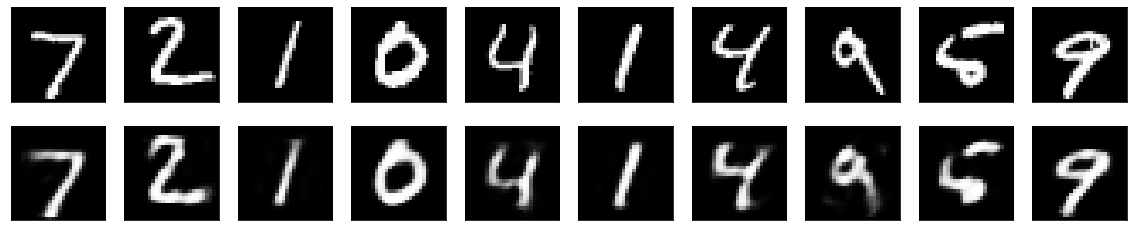

In [18]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

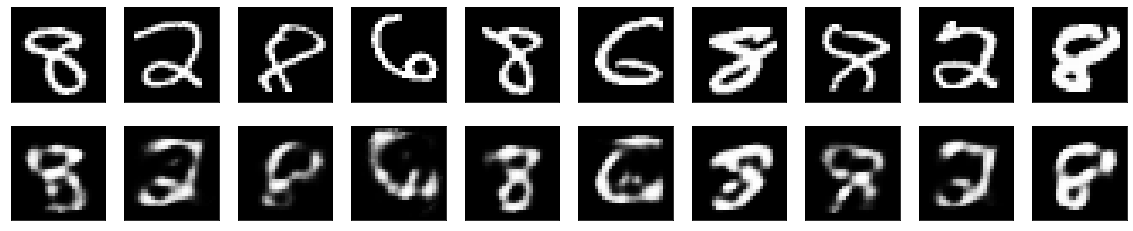

In [19]:
# display the top 10 difference images with their corresponding reconstructed images
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_top_10[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs_top_10[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In the section above a simple autoencoder was created using the MNIST dataset. The first set of images shows the first ten digits along with the corresponding reconstructed images. As can be seen, the simple 1 layer autoencoder does a pretty good job at recreating the digits. It is clear what the numbers are in the reconstructed images, however they are just not quite as sharp as the original images, which is expected.

The second set of images is the top 10 images with the highest reconstruction error along with their corresponding reconstructed images. As can be seen, although for the most part you can tell what digit each of these are, they are significantly worse looking than the other set of images. For instance, the second reconstructed, the two, almost looks like it could be a three. Clearly, the images with the higher reconstruction loss are harder to recognize than the ones with the lower reconstruction loss, which makes sense. 